In [2]:
"""
A customized sequential model
Use fashion mnist data arXiv:1708.07747, August 2017.
"""
import torch
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, BatchNormalization, Conv2D, Dense, Flatten, Add, Dropout
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tf_sequential_utils.sequential_model_frame import (
SequentialModel,
find_loss_gradients,
train_model
)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

@article{DBLP:journals/corr/abs-1708-07747,
  author    = {Han Xiao and
               Kashif Rasul and
               Roland Vollgraf},
  title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
               Algorithms},
  journal   = {CoRR},
  volume    = {abs/1708.07747},
  year      = {2017},
  url       = {http://arxiv.org/abs/1708.07747},
  archivePrefix = {arXiv},
  eprint    = {1708.07747},
  timestamp = {Mon, 13 Aug 2018 16:47:27 +0200},
  biburl    = {https://dblp.org/rec/bib/journals/corr/abs-1708-07747},
  bibsource = {dblp computer science bibliography, https://dblp.org}
}


In [3]:
# load in train /test image
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# make sure type is expected for tensorflow
train_images = train_images.astype(np.float32)
test_images = test_images.astype(np.float32)



In [4]:
# let's train on first 5000
train_images = train_images[:10000] / 255.0
train_labels = train_labels[:10000]

test_images = test_images / 255.0

train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

In [5]:
# split train/test data
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_dataset = train_dataset.batch(64)

test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_dataset = test_dataset.batch(64)

In [7]:
# initialize model
sequential_model = SequentialModel()

In [9]:
# Create the optimizer and loss

optimizer_obj = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
loss_obj = tf.keras.losses.SparseCategoricalCrossentropy()

sequential_loss_list, sequential_accuracy_list = train_model(
    sequential_model, 
    10, 
    train_dataset, 
    optimizer_obj,
    loss_obj, 
    find_loss_gradients
)


Text(0.5, 1.0, 'Accuracy vs Loss')

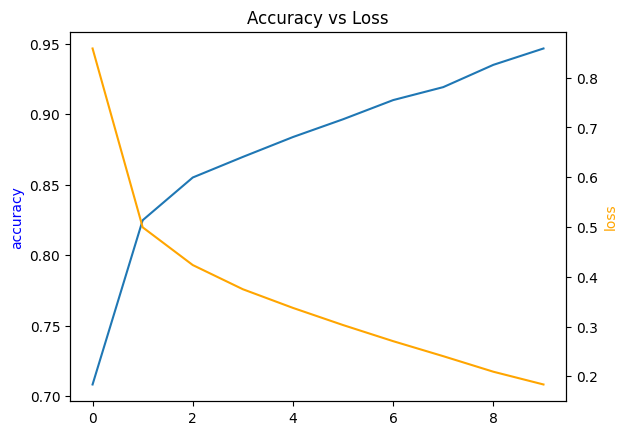

In [15]:
fig, ax1 = plt.subplots()
ax1.plot(sequential_accuracy_list, label="accuracy")
ax1.set_ylabel("accuracy", color="blue")
ax2 = ax1.twinx()
ax2.plot(sequential_loss_list, label="loss", color="orange")
ax2.set_ylabel("loss", color="orange")
plt.title("Accuracy vs Loss")


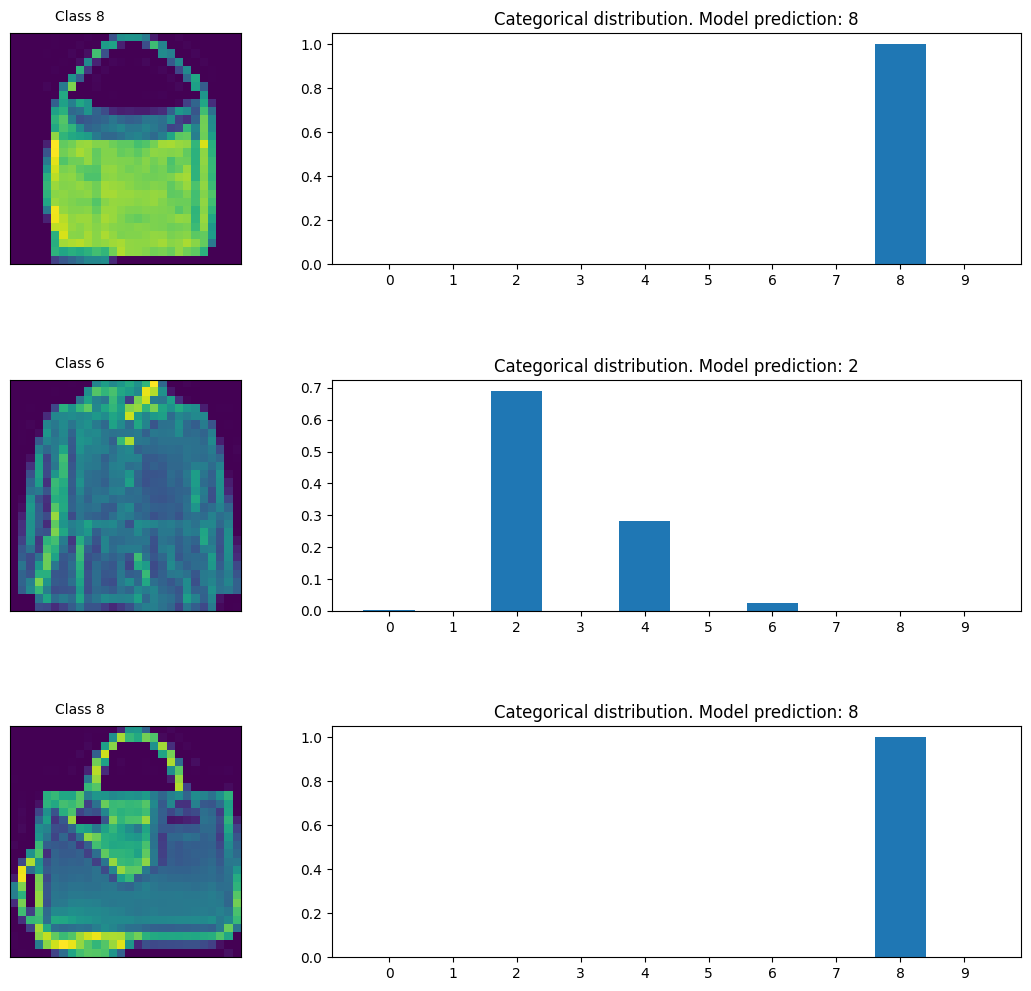

In [17]:
num_test_images = test_images.shape[0]

random_inx = [2852, 3198, 126]
random_test_images = test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = sequential_model(random_test_images)

fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.5, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(5., -2., f'Class {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    pred_inx = np.argmax(prediction)
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {pred_inx}")
    
plt.show()
